In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [19]:
#!pip install keras

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

In [3]:
X, y = sklearn.datasets.make_moons(200, noise=0.05)

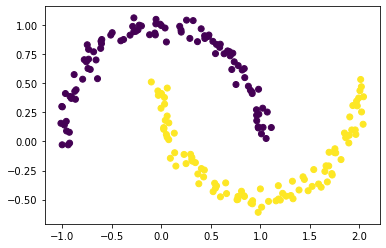

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [10]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 150 samples
Epoch 1/100
150/150 - 0s - loss: 0.8527 - accuracy: 0.3533
Epoch 2/100
150/150 - 0s - loss: 0.8389 - accuracy: 0.3867
Epoch 3/100
150/150 - 0s - loss: 0.8253 - accuracy: 0.4000
Epoch 4/100
150/150 - 0s - loss: 0.8118 - accuracy: 0.4333
Epoch 5/100
150/150 - 0s - loss: 0.7993 - accuracy: 0.4400
Epoch 6/100
150/150 - 0s - loss: 0.7865 - accuracy: 0.4667
Epoch 7/100
150/150 - 0s - loss: 0.7738 - accuracy: 0.4867
Epoch 8/100
150/150 - 0s - loss: 0.7616 - accuracy: 0.4933
Epoch 9/100
150/150 - 0s - loss: 0.7499 - accuracy: 0.4800
Epoch 10/100
150/150 - 0s - loss: 0.7376 - accuracy: 0.5000
Epoch 11/100
150/150 - 0s - loss: 0.7261 - accuracy: 0.5000
Epoch 12/100
150/150 - 0s - loss: 0.7142 - accuracy: 0.5133
Epoch 13/100
150/150 - 0s - loss: 0.7026 - accuracy: 0.5267
Epoch 14/100
150/150 - 0s - loss: 0.6910 - accuracy: 0.5467
Epoch 15/100
150/150 - 0s - loss: 0.6796 - accuracy: 0.5533
Epoch 16/100
150/150 - 0s - loss: 0.6682 - accuracy: 0.5467
Epoch 17/100
150/150 - 0s - 

# Deep Learning
For this network, we simply add an additional hidden layer of 6 nodes

In [14]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [15]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [16]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 150 samples
Epoch 1/100
150/150 - 0s - loss: 0.7860 - accuracy: 0.5133
Epoch 2/100
150/150 - 0s - loss: 0.7751 - accuracy: 0.5067
Epoch 3/100
150/150 - 0s - loss: 0.7650 - accuracy: 0.5133
Epoch 4/100
150/150 - 0s - loss: 0.7544 - accuracy: 0.5133
Epoch 5/100
150/150 - 0s - loss: 0.7447 - accuracy: 0.5133
Epoch 6/100
150/150 - 0s - loss: 0.7349 - accuracy: 0.5267
Epoch 7/100
150/150 - 0s - loss: 0.7254 - accuracy: 0.5267
Epoch 8/100
150/150 - 0s - loss: 0.7156 - accuracy: 0.5267
Epoch 9/100
150/150 - 0s - loss: 0.7060 - accuracy: 0.5267
Epoch 10/100
150/150 - 0s - loss: 0.6967 - accuracy: 0.5333
Epoch 11/100
150/150 - 0s - loss: 0.6874 - accuracy: 0.5333
Epoch 12/100
150/150 - 0s - loss: 0.6782 - accuracy: 0.5467
Epoch 13/100
150/150 - 0s - loss: 0.6686 - accuracy: 0.6000
Epoch 14/100
150/150 - 0s - loss: 0.6594 - accuracy: 0.6400
Epoch 15/100
150/150 - 0s - loss: 0.6498 - accuracy: 0.6667
Epoch 16/100
150/150 - 0s - loss: 0.6399 - accuracy: 0.7067
Epoch 17/100
150/150 - 0s - 

# Compare the models below

In [17]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

50/1 - 0s - loss: 0.3265 - accuracy: 0.8400
Normal Neural Network - Loss: 0.3350220656394958, Accuracy: 0.8399999737739563


In [18]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

50/1 - 0s - loss: 0.3234 - accuracy: 0.8400
Deep Neural Network - Loss: 0.3342342138290405, Accuracy: 0.8399999737739563
